In [13]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

In [14]:
def relu(x):
    return max(0.0, x)


def linear(x):
    return x


def gaussian(x):
    return np.exp(-x * x)


def sine(x):
    return np.sin(x)


def cosine(x):
    return np.cos(x)


def sigmoid(x):
    return 1/(1 + np.exp(-x))


def tanh(x):
    return np.tanh(x)


def softplus(x):
    return np.log(1 + np.exp(x))


def silu(x):
    return x * sigmoid(x)


def selu(x, alpha=1.67326, scale=1.0507):
    return scale * np.where(x > 0, x, alpha * (np.exp(x) - 1))


def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum(axis=0, keepdims=True)


def swish(x):
    return x * sigmoid(x)


def elu(x, alpha=1.0):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))


def prelu(x, alpha=0.25):
    return np.where(x > 0, x, alpha * x)


def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

activation_funcs = [relu, linear, gaussian, sine, cosine, sigmoid,
                    tanh, softplus, silu, selu, softmax, swish, elu, prelu, leaky_relu]

In [15]:
activation_funcs_dict = {'f1': random.choice(activation_funcs), 'f2': random.choice(activation_funcs), 
                         'out': random.choice(activation_funcs)}

weights = {'wx1': 1, 'wx2': 1, 'wy1': 1, 'wy2': 1,
           'wd1': 1, 'w23': 1, 'w13': 1, 'wd2': 1}


def randomize_everything():
    global activation_funcs_dict
    for k in weights:
        weights[k] = random.random() * random.choice([-1, 1])
    activation_funcs_dict = {'f1': random.choice(activation_funcs), 'f2': random.choice(
        activation_funcs), 'out': random.choice(activation_funcs)}


def dist_from_origin(pos, origin=(0, 0)):
    return np.sqrt((pos[0] - origin[0])**2 + (pos[1] - origin[1])**2)


def compute_output(x, y, d):
    f1 = activation_funcs_dict['f1'](
        weights['wx1'] * x + weights['wy1'] * y + weights['wd1'] * d)
    f2 = activation_funcs_dict['f2'](
        weights['wx2'] * x + weights['wy2'] * y + weights['wd2'] * d)

    return activation_funcs_dict['out'](weights['w13'] * f1 + weights['w23'] * f2)


randomize_everything()

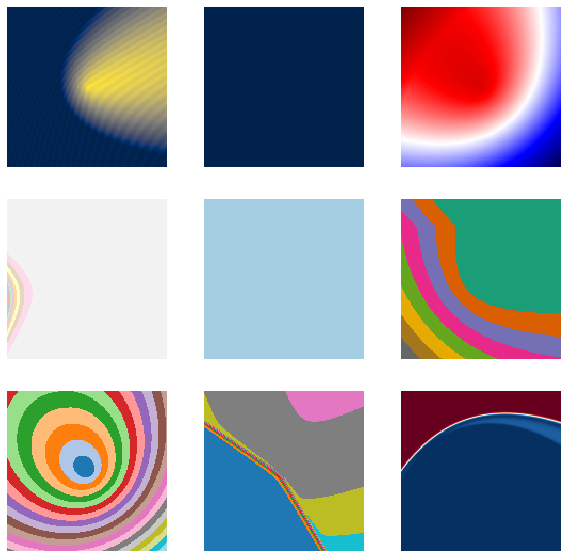

In [16]:
ax_rows = 3
ax_cols = 3

cool_cmaps = ['Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2',
              'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c'] + \
             ['twilight', 'twilight_shifted', 'hsv'] + \
             ['PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu',
             'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic'] + \
             ['viridis', 'plasma', 'inferno', 'magma', 'cividis']

width = 150

fig, ax = plt.subplots(ax_rows, ax_cols)

fig.set_size_inches(10, 10)

plt_cmap = "gist_ncar"

for ax_i in range(ax_rows):
    for ax_j in range(ax_cols):
        plt_cmap = random.choice(cool_cmaps)
        grid = [[compute_output(i, j, dist_from_origin(
            (i, j), origin=(width // 2, width // 2))) for j in range(width)] for i in range(width)]
        if ax_rows == 1 and ax_cols == 1:
            mat = ax.matshow(grid, cmap=plt_cmap)
            ax.axis("off")
        else:
            mat = ax[ax_i, ax_j].matshow(grid, cmap=plt_cmap)
            ax[ax_i, ax_j].axis("off")
        randomize_everything()

plt.show()
